# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement and Objective
The data sheet consist of the data from the Food delivery app called "FoodHub". Its a online food delivery service in New York.The objective of the problem is to analyse the demand of different restaurant which will help the application to improve its customer experience.


### Data Dictionary

* **order_id:** Unique ID of the order
* **customer_id:** ID of the customer who ordered the food
* **restaurant_name:** Name of the restaurant
* **cuisine_type:** Cuisine ordered by the customer
* **cost_of_the_order:** Price paid per order
* **day_of_the_week:** Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* **rating:** Rating given by the customer out of 5
* **food_preparation_time:** Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* **delivery_time:** Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Write your code here to import necessary libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Write your code here to read the data
path = ('/content/drive/MyDrive/AI&ML/Intro to py/Exploratory data analysis /foodhub_order.csv')
foodhub = pd.read_csv(path)

In [4]:
# Write your code here to view the first 5 rows
foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
foodhub.shape

(1898, 9)

#### Observations:
In this data frame there are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Write your code here
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are three datatype.
   1. int - order_id, customer_id, food_preparation_time, delivery_time
   2.  float - cost_of_the_order
   3. object - restaurant_name, cuisine_type, day_of_the_week, rating


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
foodhub.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
The data frame does not have any missing values. Hence, they need not be treated.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
minimum = foodhub['food_preparation_time'].min()
print('The minimum time to prepare food is:', minimum , 'minutes')
average = foodhub['food_preparation_time'].mean().round(2)
print('The average time to prepare food is:', average , 'minutes')
maximum = foodhub['food_preparation_time'].max()
print('The maximum time to prepare food is:', maximum , 'minutes')

The minimum time to prepare food is: 20 minutes
The average time to prepare food is: 27.37 minutes
The maximum time to prepare food is: 35 minutes


#### Observations:
* The minimum time it takes for food to be prepared once the order is placed is 20 minutes
*  The average time it takes for food to be prepared once the order is placed is 27.37 minutes
* The maximum time it takes for the food to be prepared once the order is placed is 35 minutes.




### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Write the code here
foodhub['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
The not rated orders are marked as 'Not given'. Hence, there are 736 orders which are not rated by the customers.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [10]:
# Write the code here
'''as the rating column is of data type object it is conveted to float'''
foodhub['rating']=foodhub['rating'].replace(['Not given'],np.nan)
foodhub['rating']=foodhub['rating'].astype(float)
foodhub['rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1162 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


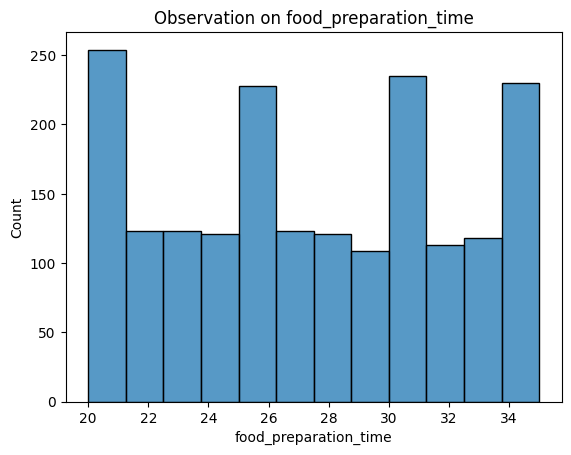

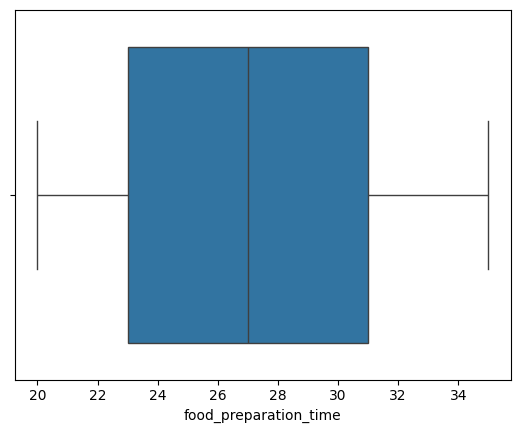

In [11]:
#observation on food_preparation_time
sns.histplot(data= foodhub, x='food_preparation_time')
plt.title('Observation on food_preparation_time')
plt.show()
sns.boxplot(data= foodhub, x ='food_preparation_time')
plt.show()

####Observations:

* From the histogram it is observed that, there are certain peaks value during the particular food prepartion time.
* From the boxplot it is observed that, the is no skewness and there are no outliers.
* The food prepartion time lies between 20 to 35 minutes



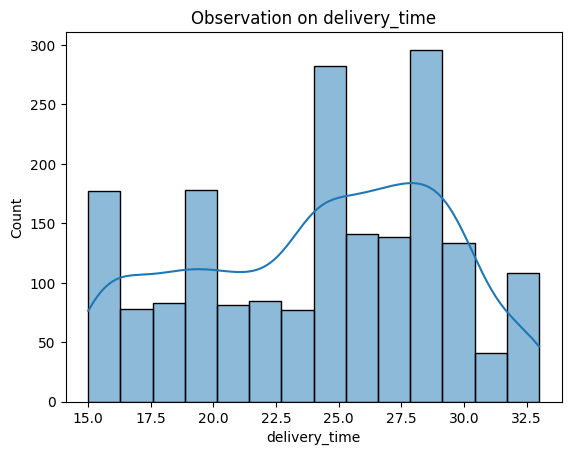

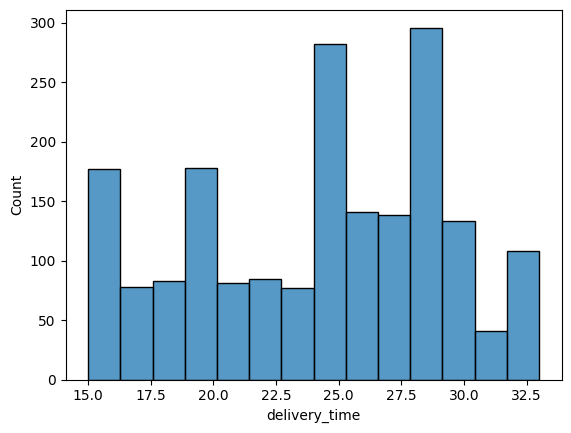

In [12]:
#Observation on delivery_time
sns.histplot(data= foodhub, x='delivery_time', kde=True);
plt.title('Observation on delivery_time');
plt.show();
sns.histplot(data= foodhub, x ='delivery_time');
plt.show();

#### Observations:-
*  From the histogram it is observed that, the delivery time is slightly right skewed.
* From the boxplot it is observed that, the is no outliers.
* The delivery time lies between 15 to 33 minutes

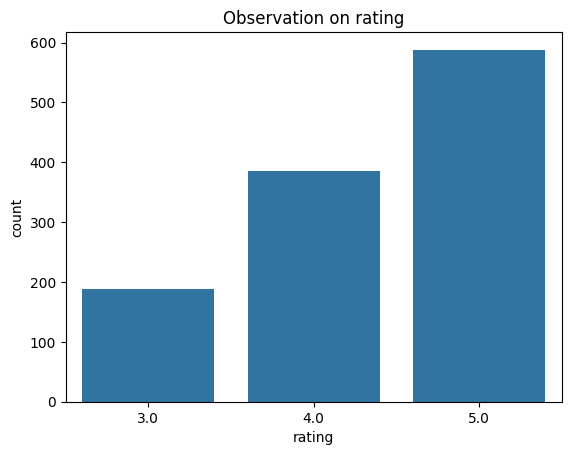

In [13]:
#observation on rating
sns.countplot(data=foodhub, x='rating');
plt.title('Observation on rating');
plt.show();

#### Observation:
* More than 580 orders are rated as 5, around 380 orders are rated as 4 and more than 180 orders are rates as 3.
* There is a particular factor which leads to the overwehling performance of certain restaurants as they have more orders rated as 5.


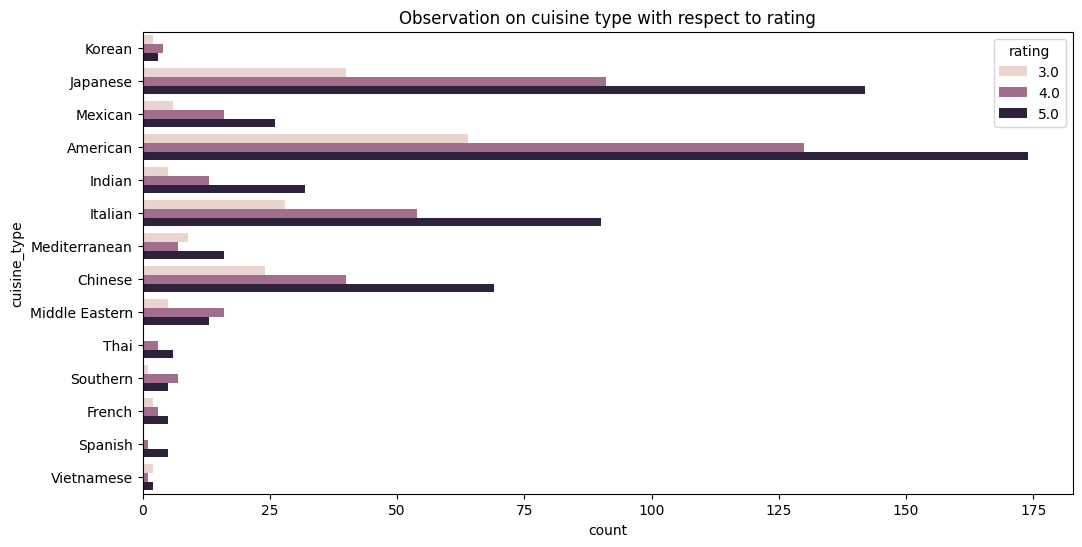

In [14]:
#observation on cusine type with rating
plt.figure(figsize=(12, 6))
sns.countplot(data=foodhub, hue='rating', y='cuisine_type');
plt.title('Observation on cuisine type with respect to rating');
plt.show();

#### Observation:
  Based on the rating given American and Japanese cuisine have more ratings followed by Italian and Chinese.

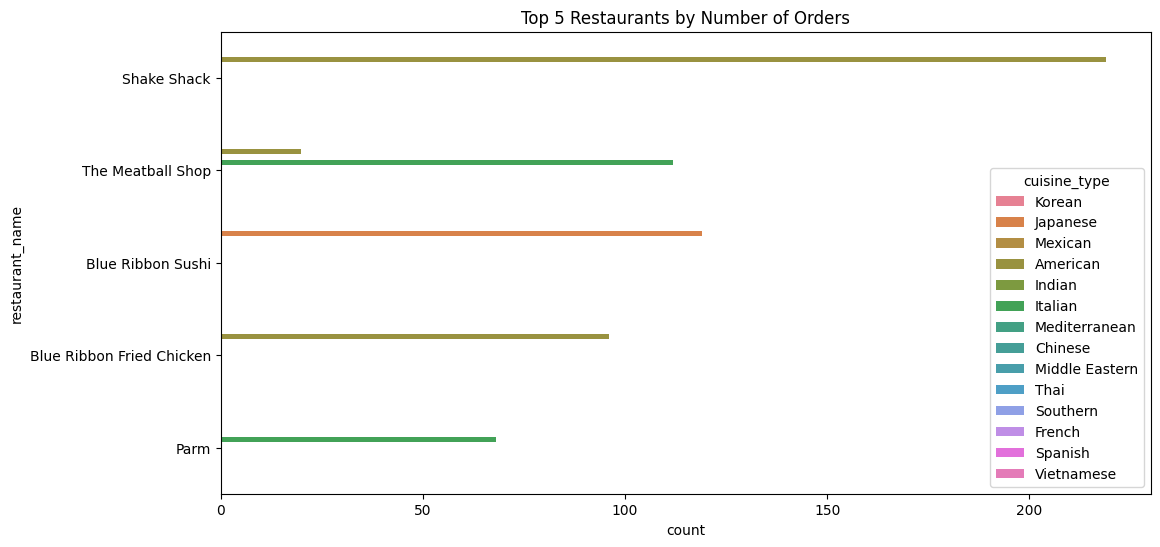

In [15]:
#Observation on restaurant name
plt.figure(figsize=(12, 6))
sns.countplot(data=foodhub, y='restaurant_name', order=foodhub['restaurant_name'].value_counts().index[0:5], hue='cuisine_type')
plt.title('Top 5 Restaurants by Number of Orders')
plt.show()

#### Observation
* The top 5 restaurants which get more orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Parm
* These restaurants sell the top rated cuisine type
1. Shake Shack - American
2. The Meatball Shop - Italian, American
3. Blue Ribbon fried chicken - American
4. Blue Ribbon Sushi - Japanese
5. Parm - Italian





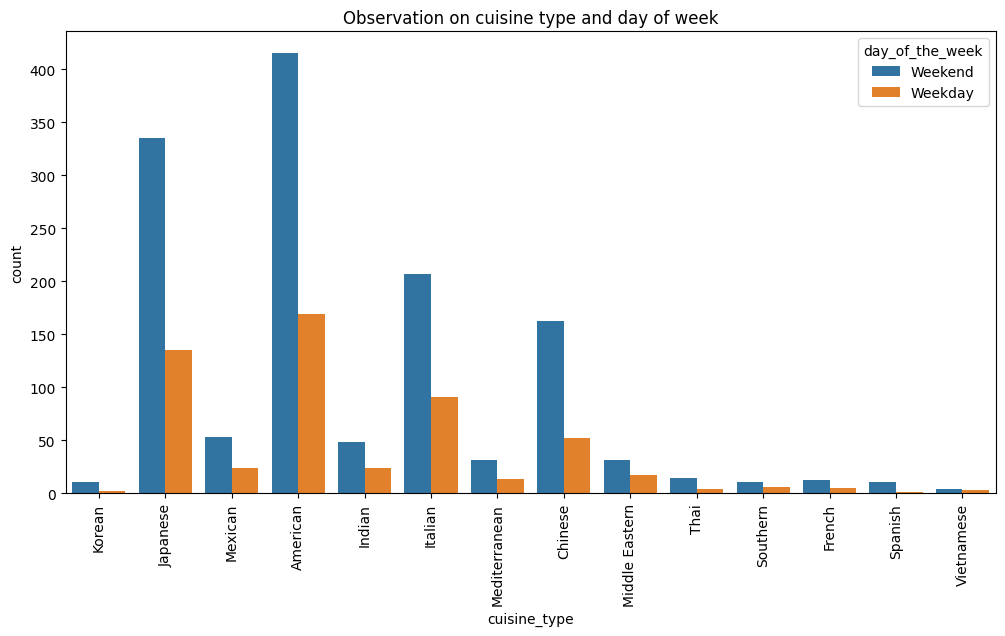

In [16]:
#Observation on cuisine type with respect to day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=foodhub, hue ='day_of_the_week', x='cuisine_type');
plt.xticks(rotation=90);
plt.title('Observation on cuisine type and day of week');
plt.show()

#### Observations:
* It is observed that more orders are taken during the weekends.
* The most ordered cuisine types are American, Japanese, Italian, Chinese and Mexican both during weekends and weekdays.
* The least ordered cuisines are Vietnamese, Korean, French, Southern, Thai and Spanish

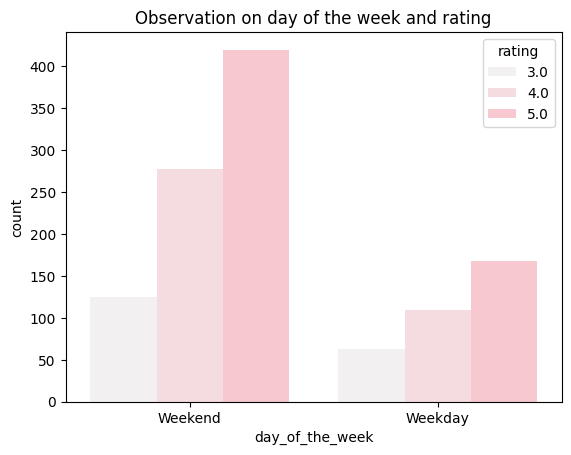

In [17]:
#observation on day_of_the_week and rating
sns.countplot(data=foodhub, x = 'day_of_the_week', hue='rating', palette='light:pink');
plt.title("Observation on day of the week and rating");

#### Observations
* More orders are placed only during weekends.
* The food orders during the weekends are mostly rated as 5.

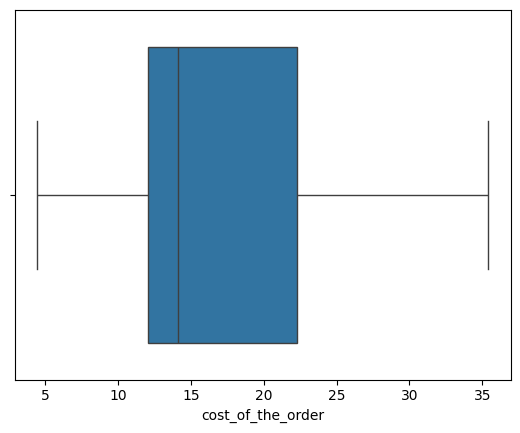

In [18]:
#observation on cost of orders
sns.boxplot(data=foodhub, x ='cost_of_the_order',);
plt.show();

#### Observation
* The cost of orders is slightly right skewed.
* Roughly the cost of orders ranges around 4 dollars to 36 dollar

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# Write the code here
foodhub['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 restaurants in terms of number of orders received are
* Shake Shack 219 orders
*The Meatball Shop 132 orders
*Blue Ribbon Sushi 119 orders
*Blue Ribbon Fried Chicken 96 orders
*Parm 68 orders


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [20]:
# Write the code here
weekends=foodhub[foodhub['day_of_the_week']=='Weekend']
cuisine= weekends['cuisine_type'].value_counts().head()
print(cuisine)

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64


#### Observations:
The most popular cuisine on weekends is American with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [21]:
# Write the code here
orders = foodhub[foodhub['cost_of_the_order']>20]
percentage = (len(orders)/len(foodhub['cost_of_the_order']))*100
print(percentage)

29.24130663856691


#### Observations:
From the total of 1898 orders, 29.24% of orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
# Write the code here
foodhub['delivery_time'].mean().round(3)

24.162

#### Observations:
The mean order delivery time is 24.162 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
# Write the code here
foodhub['customer_id'].value_counts(ascending=False).head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The top 3 most frequent customers are
* Customer ID - 52832 with 13 orders
* Customer ID - 47440 with 10 orders
* Customer ID - 83287 with 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


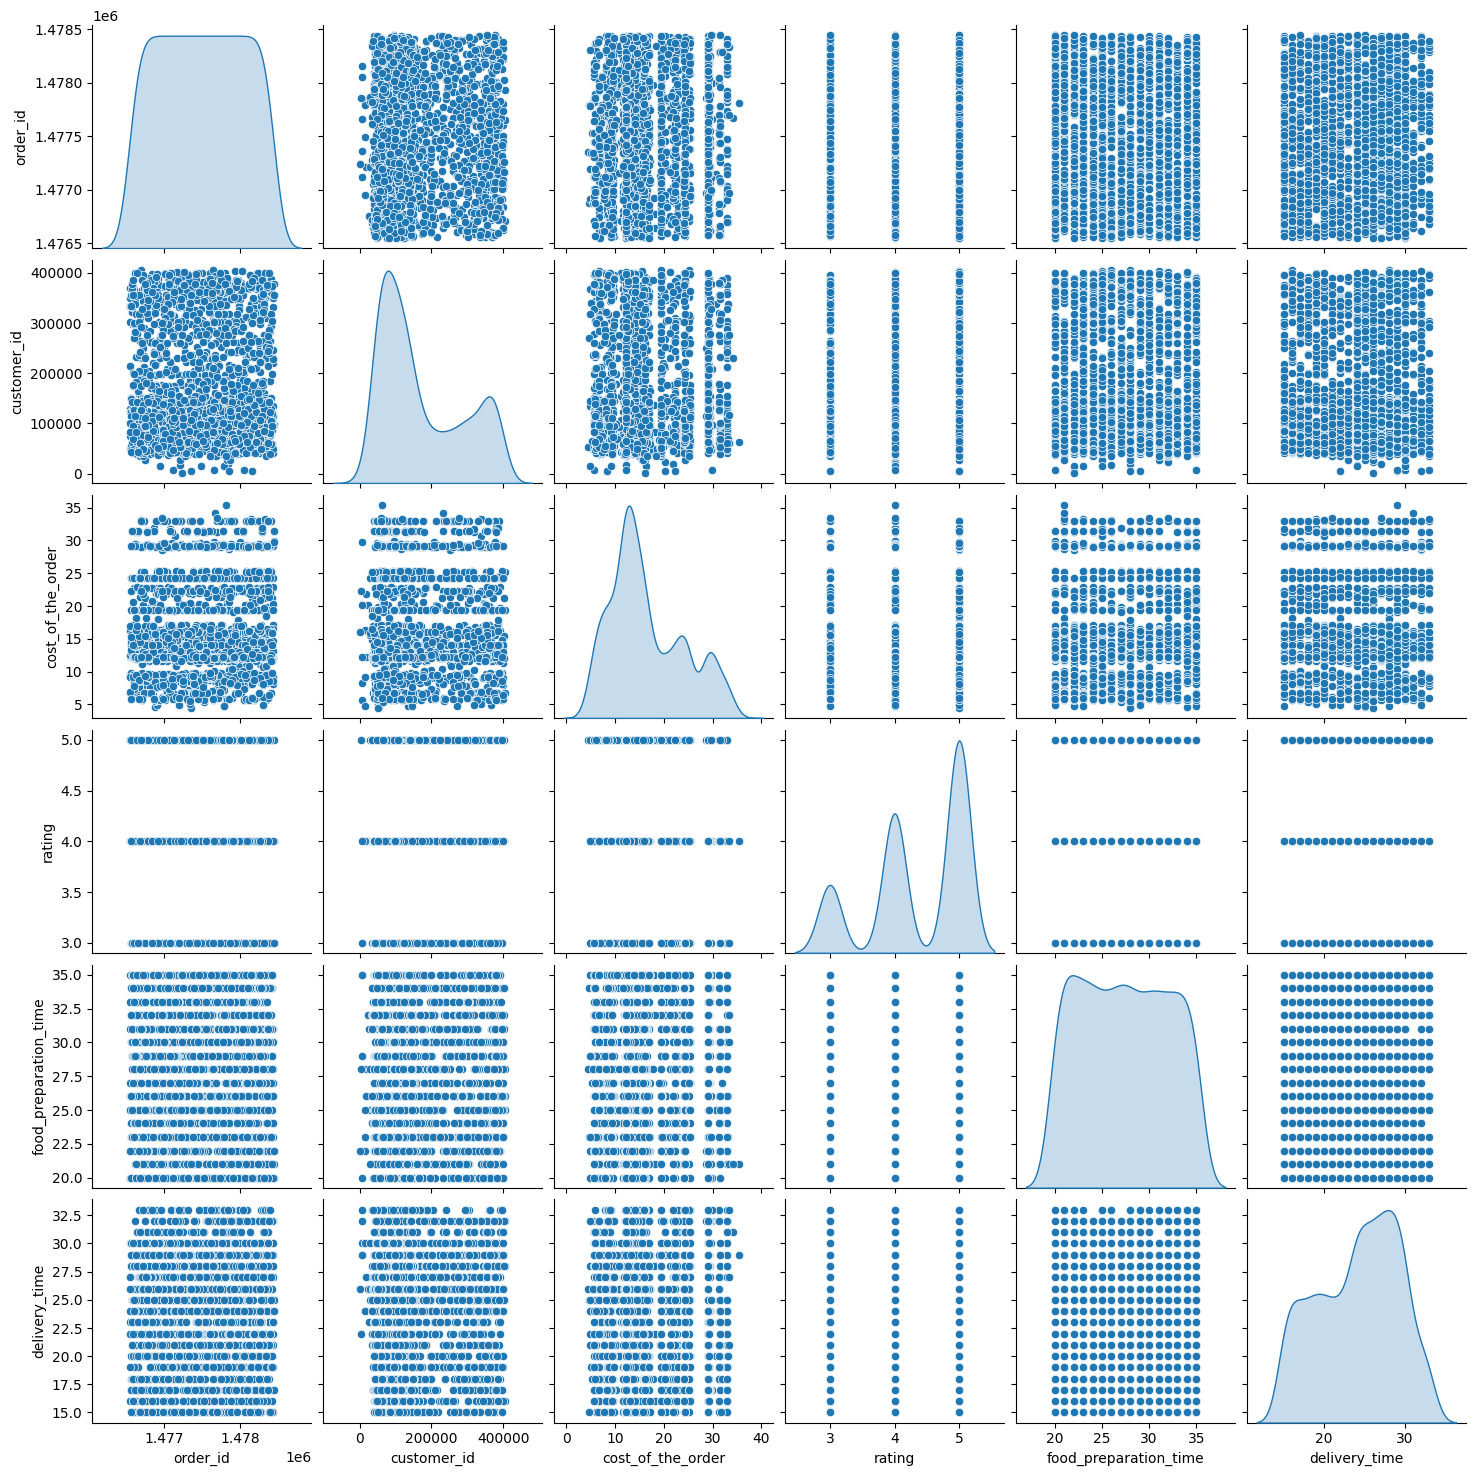

In [24]:
# Write the code here
sns.pairplot(data=foodhub, diag_kind="kde");

#### Observation on pairplot
* order id and customer id have uniform distribution.
* food prepartion time and delivery time have similar distribution.
* ratings have standard peak at certain intervals

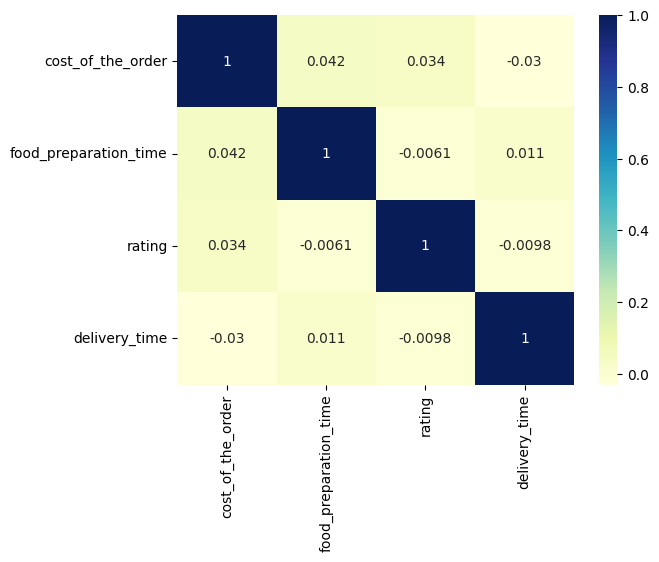

In [25]:
sns.heatmap(data=foodhub[['cost_of_the_order', 'food_preparation_time', 'rating','delivery_time']].corr(), annot=True, cmap='YlGnBu');

#### Observation
* All the value except the diagonal values lies lies around 0.00
* The highest positive correlation is between cost of the order and food preparation time.
* There is a weak negative correlation between delivery time and rating.

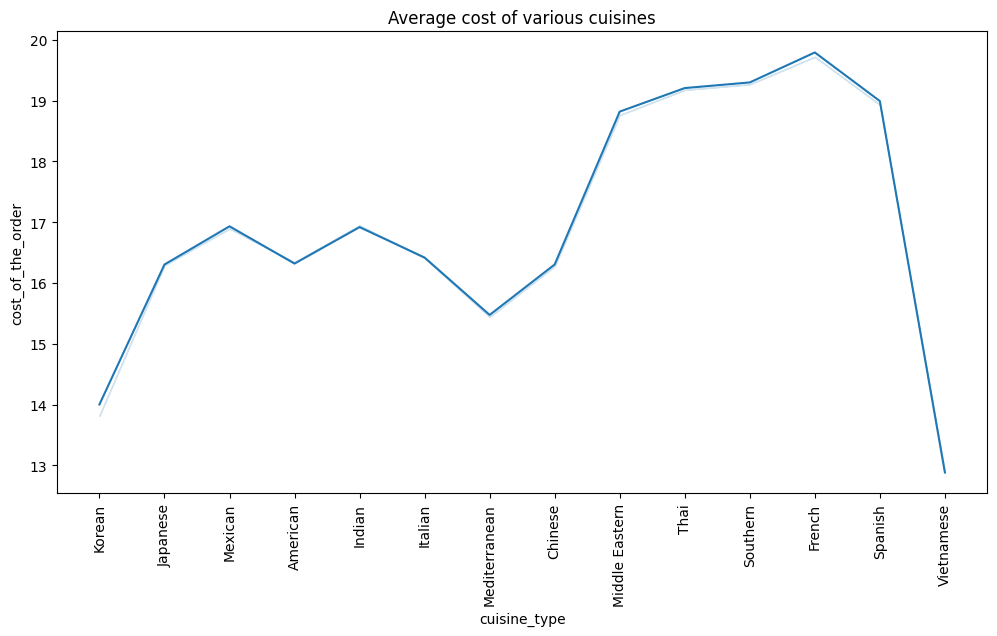

In [26]:
#Obervation on cusine type and cost of order
plt.figure(figsize=(12,6))
sns.lineplot(data=foodhub, x='cuisine_type', y='cost_of_the_order', errorbar=('ci', False));
plt.xticks(rotation=90);
plt.title('Average cost of various cuisines');

#### Observations:
* Korean and Vietnamese foods are less in cost whereas the French cost the most.

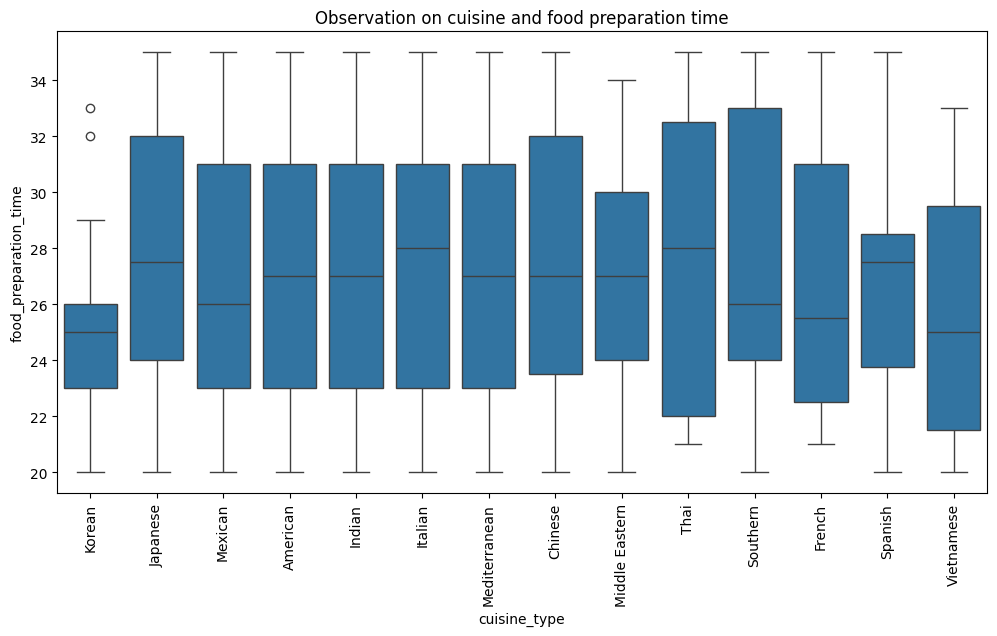

In [27]:
#Observation on cuisine and food preparation time
plt.figure(figsize=(12,6));
sns.boxplot(data=foodhub,x='cuisine_type', y='food_preparation_time');
plt.title('Observation on cuisine and food preparation time')
plt.xticks(rotation=90)
plt.show();

#### Observations:
* Outliers are present during the food prepartion time of Korean cuisine.
* There is no major difference in the food preparation time of other cuisines.

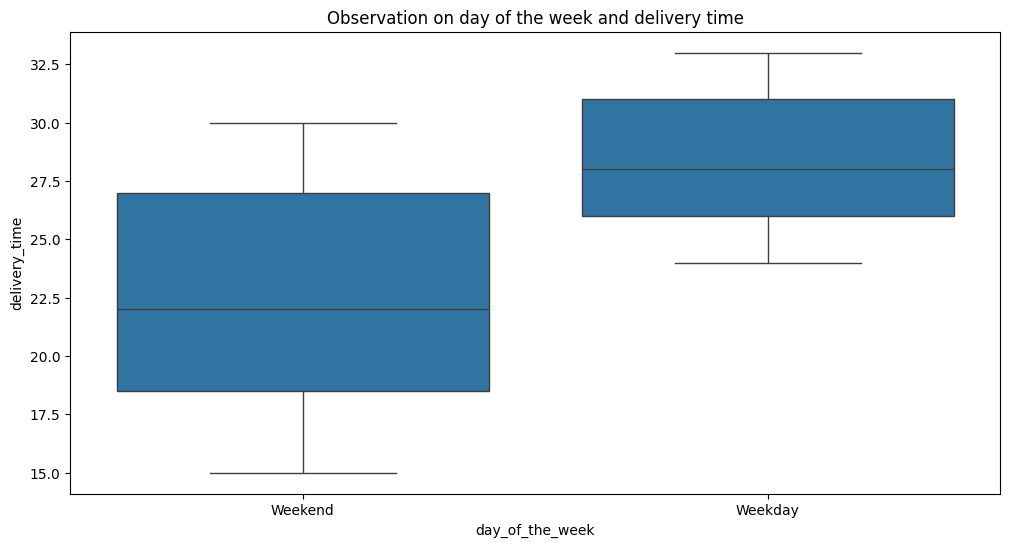

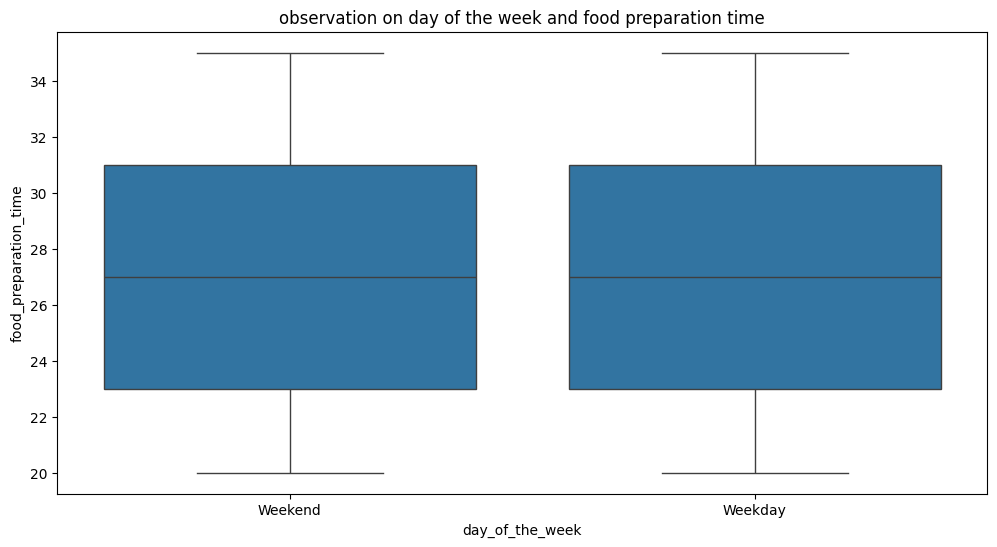

In [28]:
#Observation on day of the week and delivery time
plt.figure(figsize=(12,6));
sns.boxplot(data=foodhub,x='day_of_the_week', y='delivery_time');
plt.title('Observation on day of the week and delivery time')
plt.show();

#observation on day of the week and food preparation time
plt.figure(figsize=(12,6));
sns.boxplot(data=foodhub,x='day_of_the_week', y='food_preparation_time');
plt.title('observation on day of the week and food preparation time')
plt.show();

#### Observation
* The food delivery time during weekend is around 15 to 30 mins whereas during weekday the delivery time  is around 23 to 33 mins.
* The food preparation time during weekdays and weekends are almost same which is around 20 - 35 mins.

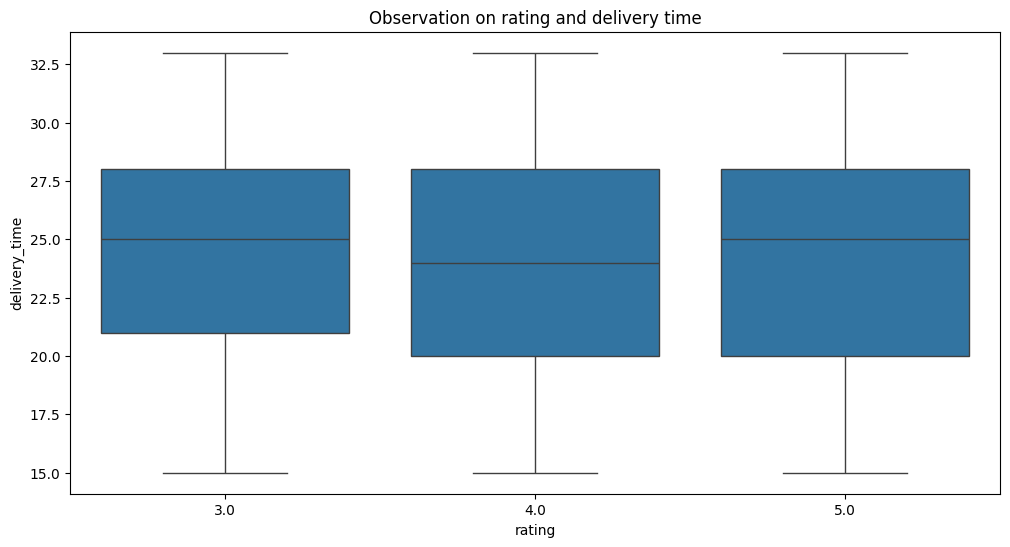

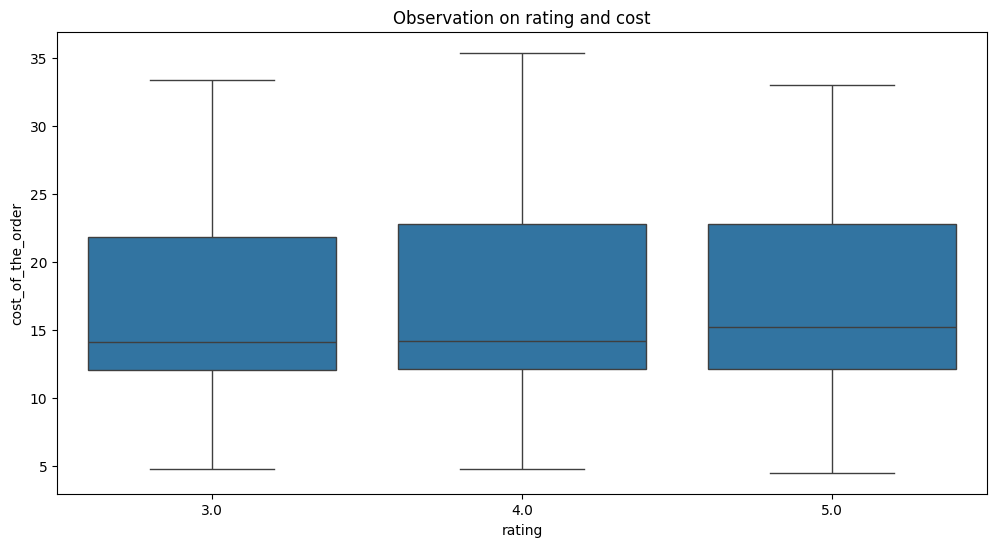

In [29]:
#Observation on rating and delivery time
plt.figure(figsize=(12,6));
sns.boxplot(data=foodhub,x='rating', y='delivery_time');
plt.title('Observation on rating and delivery time')
plt.show();

#observation on rating and cost
plt.figure(figsize=(12,6));
sns.boxplot(data=foodhub,x='rating', y='cost_of_the_order');
plt.title('Observation on rating and cost')
plt.show();

#### Observation
* There is no significant variation in terms of rating with delivery time and rating with cost of order.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [30]:
# Write the code here
restaurant_contitions = foodhub.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
eligible_restaurants = restaurant_contitions[(restaurant_contitions['count'] > 50) & (restaurant_contitions['mean'] > 4)]
print(eligible_restaurants)

                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
The restaurants that get the promotional offer are
* Blue Ribbon Fried Chicken     
* Blue Ribbon Sushi            
* Shake Shack                 
* The Meatball Shop  



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [31]:
# Write the code here
cost_greater_than_5_dollars = foodhub[foodhub['cost_of_the_order'] > 5]
cost_greater_than_20_dollars = foodhub[foodhub['cost_of_the_order'] > 20]

#revenue calculation
revenue_5_to_20 = cost_greater_than_5_dollars[cost_greater_than_5_dollars['cost_of_the_order'] <= 20]['cost_of_the_order'].sum() * 0.15
revenue_above_20 = cost_greater_than_20_dollars['cost_of_the_order'].sum() * 0.25

#net revenue calculation
net_revenue = revenue_5_to_20 + revenue_above_20
print('The net revenue generated by the company across all orders is:', net_revenue, 'dollars')

The net revenue generated by the company across all orders is: 6166.303 dollars


#### Observations:
The net revenue generated by the company across all orders is 6166.303 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [32]:
# Write the code here
foodhub['total_time_period'] = foodhub['food_preparation_time']+foodhub['delivery_time']

''''the total time required to deliver the food incluidng food preparation time and food delivery time is considered as total_time_period'''

greater_than_60_mins= foodhub[foodhub['total_time_period']>60]
percentage_total_delivery_time = (len(greater_than_60_mins)/len(foodhub['total_time_period']))*100
print('Percentage of orders is:', percentage_total_delivery_time)

Percentage of orders is: 10.537407797681771


#### Observations:
Around 10.53% of the orders take more than 60 minutes to get delivered from the time the order is placed.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [33]:
# Write the code here
weekday_data=foodhub[foodhub['day_of_the_week'].isin(['Weekday'])]
weekend_data=foodhub[foodhub['day_of_the_week'].isin(['Weekend'])]

mean_delivery_time_weekday= weekday_data['delivery_time'].mean()
mean_delivery_time_weekend= weekend_data['delivery_time'].mean()

print('Mean delivery time during weekday', round(mean_delivery_time_weekday))
print('Mean delivery time during weekend', round(mean_delivery_time_weekend))


Mean delivery time during weekday 28
Mean delivery time during weekend 22


#### Observations:
* The mean delivery time during weekday is 28 minutes.
* The mean delivery time during weekend is 22 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  More orders are placed during the weekend and most of those orders are top rated.
* The most ordered cuisine types are American, Japanese, Italian, Chinese and Mexican both during weekends and weekdays.
* The least ordered cuisines are Vietnamese, Korean, French, Southern, Thai and Spanish
* The top 5 restaurants in terms of number of orders received are Shake Shack with 219 orders, The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders and Parm with 68 orders.
* The top restaurants and their top rated cuisine type are Shake Shack - American, The Meatball Shop - Italian & American, Blue Ribbon Sushi - Japanese, Blue Ribbon Fried Chicken - American and Parm - Italian
* The top 3 most frequent customers are Customer ID 52832 with 13 orders, Customer ID - 47440 with 10 orders and Customer ID - 83287 with 9 orders
* Korean and Vietnamese foods are less in cost whereas the French cost the most.
* 736 orders are not rated.
* The revenue generated from the orders which cost between 5 to 20 dollars is 2477.57 dollars and above 20 dollars is 3688.72 dollars

### Recommendations:

*  As the orders are more during weekend, more delivery persons can be alloted to deliver the order which will reduce the delivery time and might increase the ratings.
* As the orders are low during weekdays, promotional offers and discounts could be given to the cutomers to increase the number of orders.
* The food delivery app can increase the restaurants which sell the top cuisines.
* For the restaurants that have more order, the delivery app can feature them as top restaurants and give exclusive deals. And the restaurants may be asked to maintain their standard of food.
* As more orders are not rated, the delivery app can make rating as a mandatory option to improve future analysis.
* As the revenue genrated from the order cost between 5 to 20 is less, to increase the orders, the delivery app can give the customers free delivery, discounts and some complimentary items.
* For low rating in the orders, conducting survery to know the quality of the food, packaging of the food, delivery time and many such factors will be helpful.
